In [18]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import numpy as np
import random
import matplotlib.pyplot as plt

In [4]:
X_train=np.loadtxt('input.csv', delimiter=',')
y_train=np.loadtxt('labels.csv',delimiter=',')

X_test=np.loadtxt('input_test.csv',delimiter=',')
y_test=np.loadtxt('labels_test.csv',delimiter=',')

In [12]:
X_train=X_train.reshape(len(X_train),100,100,3)
y_train=y_train.reshape(len(y_train),1)

X_test=X_test.reshape(len(X_test),100,100,3)
y_test=y_test.reshape(len(y_test),1)

X_train=X_train/255.0
X_test=X_test/255.0

In [13]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(2000, 100, 100, 3)
(2000, 1)
(400, 100, 100, 3)
(400, 1)


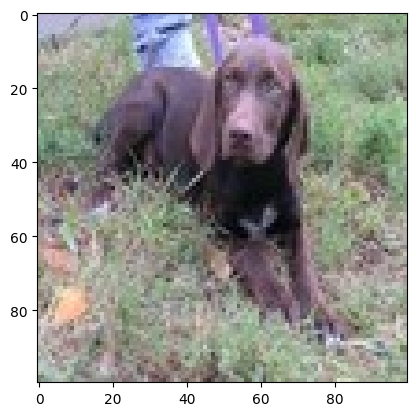

In [49]:
idx=random.randint(0,len(X_train))
plt.imshow(X_train[idx,:])
plt.show()

In [22]:
model=Sequential([
    Conv2D(32,(3,3),activation='relu',input_shape=(100,100,3)),
    MaxPooling2D((2,2)),

    Conv2D(32,(3,3),activation='relu'),
    MaxPooling2D((2,2)),

    Flatten(),
    Dense(64,activation='relu'),
    Dense(1,activation='sigmoid')
])

In [24]:
model.compile(loss='binary_crossentropy',optimizer='adam',metrics='accuracy')

In [27]:
model.fit(X_train,y_train,epochs=5,batch_size=64)

Epoch 1/5
32/32 [==============================] - 7s 206ms/step - loss: 0.1997 - accuracy: 0.9290
Epoch 2/5
32/32 [==============================] - 7s 230ms/step - loss: 0.1795 - accuracy: 0.9340
Epoch 3/5
32/32 [==============================] - 8s 245ms/step - loss: 0.1409 - accuracy: 0.9565
Epoch 4/5
32/32 [==============================] - 8s 241ms/step - loss: 0.1170 - accuracy: 0.9670
Epoch 5/5
32/32 [==============================] - 8s 263ms/step - loss: 0.1156 - accuracy: 0.9650


In [30]:
model.evaluate(X_test,y_test)

13/13 [==============================] - 1s 31ms/step - loss: 1.0544 - accuracy: 0.6525


[1.0543534755706787, 0.6524999737739563]

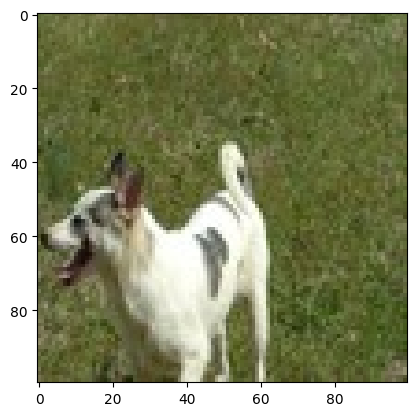

1/1 [==============================] - 0s 40ms/step
Dog


In [55]:
idx2=random.randint(0,len(y_test))
plt.imshow(X_test[idx2,:])
plt.show()

y_pred=model.predict(X_test[idx2,:].reshape(1,100,100,3))
print("Dog" if y_pred<0.5 else "Cat")